__PCA的四个步骤:__标准化数据,构建协方差矩阵,得到特征值特征向量,排序得到排序靠前的特征向量

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 使用白酒数据集
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [11]:
# 对数据进行标准化
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
sc = StandardScaler()

In [15]:
x_train_std = sc.fit_transform(x_train)

In [16]:
x_test_std = sc.transform(x_test)

In [22]:
# 使用np.cov函数得到数据的协方差矩阵
cov_mat = np.cov(x_train_std.T)

In [23]:
# 使用np.linalg.eig函数得到特征值和特征向量
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
       0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
       0.16831254, 0.21432212, 0.2399553 ])

In [26]:
# 求方差解释率
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.37329648, 0.56148574, 0.67045365, 0.74769754, 0.81248349,
       0.85840362, 0.89827298, 0.92349212, 0.94607393, 0.96438317,
       0.98073654, 0.99357924, 1.        ])

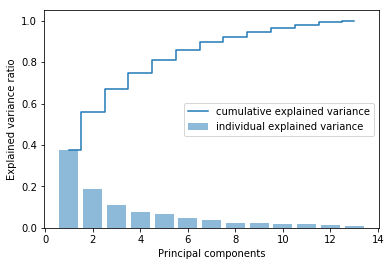

In [30]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()